# Transfermarkt Transfers

**Disclaimers** : 
- The analysis scope is based on the dataset, especially on the defined transfer date range. Some info and numbers may differ from the real complete data out there.
- Some data may be missing because of scraping issue or restricted by the transfermarkt themselves.

The dataset was politely scraped from [transfermarkt.com](https://www.transfermarkt.com/statistik/transfertage) using Scrapy and Splash. The notebook will be updated as the scraping goes from time to time. Check the `Transfer Date Range` section below to find out the oldest and latest date.

## Preparation

### Import Libraries

In [209]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import sys
import datetime
from IPython.core.interactiveshell import InteractiveShell

pd.set_option('display.max_columns', None)
InteractiveShell.ast_node_interactivity = "all"
warnings.filterwarnings('ignore')

print("python version: ", sys.version)
print("pandas version: ", pd.__version__)
print("seaborn version: ", sns.__version__)

print("last run: ", datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S"))


python version:  3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version:  1.1.3
seaborn version:  0.11.0
last run:  2021-11-05 23:15:27


### Loading Dataset

In [210]:
df = pd.read_csv("transfermarkt-transfer.csv")

# developer-friendly column names and format
df.columns = [x.lower().replace('-', '_').replace(' ', '_') for x in df.columns.to_list()]

df.sample(5, random_state=1)

,player_id,name,age,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date,transfer_date_p,market_value,market_value_p,fee,left_club_country,joined_club_country,loan_fee,loan_fee_p,created_at,updated_at
6604,335736,Iliyan Popov,22.0,Right-Back,Bulgaria,NaN,Yantra,Vtora Liga,Without Club,NaN,"Oct 10, 2020",2020-10-10,€50Th.,50000,-,Bulgaria,NaN,NaN,NaN,2021-10-04 16:12:54,2021-10-04 16:12:54
11841,255383,Michal Helik,25.0,Centre-Back,Poland,NaN,Cracovia,Ekstraklasa,Barnsley FC,Championship,"Sep 9, 2020",2020-09-09,€600Th.,600000,€800Th.,Poland,England,NaN,NaN,2021-10-04 16:39:13,2021-10-04 16:39:13
34358,223225,Dan Crowley,23.0,Attacking Midfield,England,Ireland,Birmingham,Championship,Hull City,League One,"Jan 18, 2021",2021-01-18,€1.50m,1500000,loan transfer,England,England,NaN,NaN,2021-11-02 11:42:18,2021-11-02 11:42:18
16016,156629,Ivan Kovacec,32.0,Left Winger,Croatia,NaN,SV Ried,Bundesliga,NK Zagorec,NaN,"Aug 31, 2020",2020-08-31,€200Th.,200000,free transfer,Austria,Croatia,NaN,NaN,2021-10-04 17:01:01,2021-10-04 17:01:01
7583,399336,Vincenzo Garofalo,21.0,Central Midfield,Italy,NaN,Avellino,Serie C - C,Foggia,Serie C - C,"Oct 5, 2020",2020-10-05,€50Th.,50000,free transfer,Italy,Italy,NaN,NaN,2021-10-04 16:17:20,2021-10-04 16:17:20


## Dataset Information & Description

### Data Sample

In [211]:
df.sample(5, random_state=1)

,player_id,name,age,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date,transfer_date_p,market_value,market_value_p,fee,left_club_country,joined_club_country,loan_fee,loan_fee_p,created_at,updated_at
6604,335736,Iliyan Popov,22.0,Right-Back,Bulgaria,NaN,Yantra,Vtora Liga,Without Club,NaN,"Oct 10, 2020",2020-10-10,€50Th.,50000,-,Bulgaria,NaN,NaN,NaN,2021-10-04 16:12:54,2021-10-04 16:12:54
11841,255383,Michal Helik,25.0,Centre-Back,Poland,NaN,Cracovia,Ekstraklasa,Barnsley FC,Championship,"Sep 9, 2020",2020-09-09,€600Th.,600000,€800Th.,Poland,England,NaN,NaN,2021-10-04 16:39:13,2021-10-04 16:39:13
34358,223225,Dan Crowley,23.0,Attacking Midfield,England,Ireland,Birmingham,Championship,Hull City,League One,"Jan 18, 2021",2021-01-18,€1.50m,1500000,loan transfer,England,England,NaN,NaN,2021-11-02 11:42:18,2021-11-02 11:42:18
16016,156629,Ivan Kovacec,32.0,Left Winger,Croatia,NaN,SV Ried,Bundesliga,NK Zagorec,NaN,"Aug 31, 2020",2020-08-31,€200Th.,200000,free transfer,Austria,Croatia,NaN,NaN,2021-10-04 17:01:01,2021-10-04 17:01:01
7583,399336,Vincenzo Garofalo,21.0,Central Midfield,Italy,NaN,Avellino,Serie C - C,Foggia,Serie C - C,"Oct 5, 2020",2020-10-05,€50Th.,50000,free transfer,Italy,Italy,NaN,NaN,2021-10-04 16:17:20,2021-10-04 16:17:20


### Columns Description

| Column | Description | Data Type |
| --- | ----------- | ------- |
| player_id | The player's ID in transfermarkt site | categorical - unique |
| name | The player's name | categorical - nominal |
| age | The player's age | numerical - discrete |
| position | The player's position | categorical - nominal |
| national_1 | The player's nationality | categorical - nominal |
| national_2 | The player's other nationality | categorical - nominal |
| left_club | the player's former club | categorical - nominal |
| left_club_league | the player's former club league | categorical - nominal |
| left_club_country | the player's former club country | categorical - nominal |
| join_club | the player's new club | categorical - nominal |
| join_club_league | the player's new club league | categorical - nominal |
| join_club_country | the player's new club country | categorical - nominal |
| transfer_date | the transfer date | categorical - nominal |
| transfer_date_p | the transfer date (parsed) | categorical - date |
| market_value | the player's market value | categorical - nominal |
| market_value_p | the player's market value (parsed) | numerical - discrete |
| fee | - | categorical - nominal |
| loan_fee | - | categorical - nominal |
| loan_fee_p | - | numerical - discrete |
| created_at | the time data created (scraped) | categorical - datetime |
| updated_at | the time data edited (after scraped) | categorical - datetime |


### Data Information

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38212 entries, 0 to 38211
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            38212 non-null  int64  
 1   name                 38212 non-null  object 
 2   age                  37992 non-null  float64
 3   position             38212 non-null  object 
 4   national_1           38211 non-null  object 
 5   national_2           5940 non-null   object 
 6   left_club            38212 non-null  object 
 7   left_club_league     27721 non-null  object 
 8   joined_club          37776 non-null  object 
 9   joined_club_league   26800 non-null  object 
 10  transfer_date        38212 non-null  object 
 11  transfer_date_p      38212 non-null  object 
 12  market_value         38212 non-null  object 
 13  market_value_p       38212 non-null  int64  
 14  fee                  38211 non-null  object 
 15  left_club_country    35180 non-null 

### Transfers Date Range

In [213]:
print(f"from {df.sort_values(['transfer_date_p']).iloc[[0, -1]].values[0, 10]} to {df.sort_values(['transfer_date_p']).iloc[[0, -1]].values[1, 10]}")

from Jul 4, 2020 to Feb 1, 2021


## Preprocessing

### Remove Unnecessary Features

In [214]:
df.drop(['market_value', 'transfer_date', 'created_at', 'updated_at'], axis=1, inplace=True)

### Remove Duplication

In [215]:
print("duplicated count before removal:", df.duplicated(cols).sum())

df.drop_duplicates(inplace=True)

print("duplicated count after removal:", df.duplicated(cols).sum())


duplicated count before removal: 398
duplicated count after removal: 0


## Exploratory Data Analysis

### Descriptive Statistics

#### Numerical

In [216]:
df.select_dtypes(include='number').describe()


,player_id,age,market_value_p,loan_fee_p
count,37814.000000,37594.000000,3.781400e+04,1.970000e+02
mean,349023.177738,25.517689,4.014903e+05,9.463604e+05
std,194659.288844,4.687207,1.824081e+06,1.915119e+06
min,532.000000,15.000000,1.000000e+04,2.000000e+03
25%,190173.500000,22.000000,5.000000e+04,1.050000e+05
50%,340892.500000,25.000000,1.000000e+05,4.500000e+05
75%,499494.500000,29.000000,2.500000e+05,1.000000e+06
max,860256.000000,45.000000,8.100000e+07,2.000000e+07


#### Categorical

In [217]:
df.select_dtypes(exclude='number').describe()


,name,position,national_1,national_2,left_club,left_club_league,joined_club,joined_club_league,transfer_date_p,fee,left_club_country,joined_club_country,loan_fee
count,37814,37814,37813,5890,37814,27368,37378,26444,37814,37813,34794,34232,197
unique,33226,16,202,171,6442,316,6878,334,213,361,159,160,74
top,Juninho,Centre-Forward,Italy,Italy,Without Club,Premier League,Without Club,Premier League,2020-08-01,free transfer,Italy,Italy,€500Th.
freq,10,6049,3679,749,2754,810,2767,649,2062,19103,4100,4175,21


### Univariate Analysis

In [218]:
pass

### Multivariate Analysis

In [219]:
pass

### Insights

#### Most Valueable Nation by Player Transfers

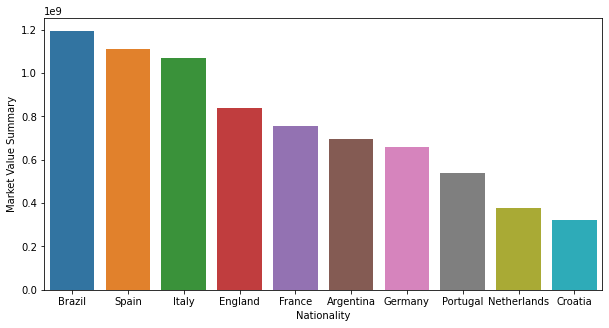

In [220]:
idf = df.groupby('national_1').agg({'market_value_p': 'sum'}).sort_values('market_value_p', ascending=False).reset_index().head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='national_1', y='market_value_p', data=idf)
plt.ylabel('Market Value Summary')
plt.xlabel('Nationality')
plt.show();